In [ ]:
# Hello! Welcome to my work and thanks to Locale for giving me this opportunity.
# How to read this work:
# Mostly I have tried to comment and explain what I am doing but in many places, I have coded something and the inference is written in bold just after the output. Please refer to them as well. I have also compiled the conclusions at the end.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("LocaleData.csv") # Loading the dataset

In [4]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [5]:
data.shape

(43431, 19)

In [6]:
data.isnull().sum() #Finding total null values

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [7]:
long=data[data.travel_type_id==1]   #Long is for Long journey package
point=data[data.travel_type_id==2]  #For point-to-point package
hour=data[data.travel_type_id==3]  #Hourly basis package

In [8]:
long.shape

(1589, 19)

In [9]:
long.isnull().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id             1589
travel_type_id            0
from_area_id             88
to_area_id             1588
from_city_id            196
to_city_id                1
from_date                 0
to_date                  85
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 1588
to_long                1588
Car_Cancellation          0
dtype: int64

In [10]:
point.shape

(34292, 19)

In [11]:
point.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
from_date                  0
to_date                15185
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

In [12]:
hour.shape

(7550, 19)

In [13]:
hour.isnull().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id                0
travel_type_id            0
from_area_id              0
to_area_id             7550
from_city_id           7102
to_city_id             7550
from_date                 0
to_date                2620
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                 7550
to_long                7550
Car_Cancellation          0
dtype: int64

# Point-to-point Analysis

In [14]:
point.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [15]:
point.shape

(34292, 19)

In [16]:
point.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
from_date                  0
to_date                15185
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

#### >> Package_id, to_city_id is not available for any value in the point dataset,
#### >> from_city & to_date are not available for almost half of the dataset so it will be dangerous to make predictions based on this


In [17]:
#drop columns which are not applicable to point-to-point and columns with all nan values
point=point.drop(['package_id', 'from_city_id', 'to_city_id', 'to_date'], axis=1)

In [18]:
#Convert date and time to standard format
point.from_date = pd.to_datetime(point.from_date)
point.booking_created = pd.to_datetime(point.booking_created)
point.head()

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0


In [19]:
point.dtypes #We see that from_date and booking time is now changed to datetime format

id                              int64
user_id                         int64
vehicle_model_id                int64
travel_type_id                  int64
from_area_id                  float64
to_area_id                    float64
from_date              datetime64[ns]
online_booking                  int64
mobile_site_booking             int64
booking_created        datetime64[ns]
from_lat                      float64
from_long                     float64
to_lat                        float64
to_long                       float64
Car_Cancellation                int64
dtype: object

In [19]:
point.time=point.from_date.dt.time   #Extracting time 
point.book=point.booking_created.dt.time


C:\Users\dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [20]:
point['diff'] = point['from_date'] - point['booking_created'] #Difference between booking time and the time when trip start
point['diff']=point['diff']/np.timedelta64(1,'m')
point.head()

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,diff
0,132512,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,21.0
1,132513,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,395.0
2,132514,22178,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,22.0
3,132515,13034,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,66.0
4,132517,22180,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,67.0


##### Now let us try to find relation between no of bookings and time

10    2411
11    2316
19    2238
20    2214
17    2167
16    2145
12    2137
15    2094
18    2083
14    1997
13    1938
22    1776
21    1758
9     1653
23    1306
8     1241
7      858
0      740
1      381
6      310
2      178
5      134
3      121
4       96
Name: booking_created, dtype: int64


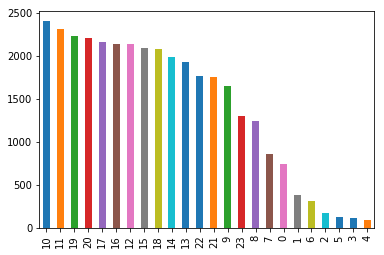

In [21]:
a=point.booking_created.dt.hour.value_counts() # Number of bookings made by time in hour
print(a)
a.plot(kind='bar')

### >> We make some inferences here that there are a few time hour sets when the bookings are at peak: 10.00-12.00 is a peak hour, 16.00-20.00 is another peak hour. So prices can be high at this time and at 01.00-7.00 prices can be minimum. We could devise some pricing scheme based on the time.
### Thus we can make a deduction of forming batch of timings on the basis of demand timings(Reason for this can be understood below as we will need to use these batches):
####   Night and Early morning (1.00-7.00)
####   Morning 1 (7.00-10.00)
####   Morning 2 (10.00-12.00)
####   Noon  ( 13.00-16.00)
####   Evening  (16.00-20.00)
####   Early night (20.00-00.00)

### -------
#### Now that we have looked at time wise bookings, let us look at area wise bookings

In [22]:
a=point.from_area_id.value_counts() #Count of from_Area_id
p=a.index
a.head()

393.0     3375
571.0     1198
585.0      798
293.0      760
1384.0     599
Name: from_area_id, dtype: int64

#### >>This gives us an overall idea that in areas with different ids most bookings are made but let us make a closer analysis and  try to find out relation between area and time of booking


In [23]:
for i in range(0,10): # Loop over 586 areas to find relation between time and area but for good visiblity ran the loop for 10 only
    z=point.from_date.dt.hour[point.from_area_id==p[i]].value_counts().idxmax()
    print(p[i],"-->",z,".00")

393.0 --> 23 .00
571.0 --> 17 .00
585.0 --> 7 .00
293.0 --> 17 .00
1384.0 --> 7 .00
142.0 --> 3 .00
1010.0 --> 18 .00
83.0 --> 8 .00
1096.0 --> 17 .00
1026.0 --> 8 .00


### For the above table we see, this explains the time in hour with most bookings. Here we will use the batch as made above. This shall help us in serving the car services more in these batch hours.
### For example: For area with id 393.0 we see 23.00 is the time with most bookings, so we use the batch 'Early Night' meaning from 20.00- 00.00, the car services frequency shall be increased


## -----------
### Also, here below lets do the reverse, that is find most used area for each hour

In [24]:
for i in range(0,24): #Loop over time from 0.00-23.00 to find relation between time and area
    c=point.from_area_id[point.from_date.dt.hour==i].value_counts().idxmax()
    print("Time ",i,".00 area id->>", c)

Time  0 .00 area id->> 393.0
Time  1 .00 area id->> 393.0
Time  2 .00 area id->> 571.0
Time  3 .00 area id->> 571.0
Time  4 .00 area id->> 393.0
Time  5 .00 area id->> 393.0
Time  6 .00 area id->> 585.0
Time  7 .00 area id->> 585.0
Time  8 .00 area id->> 1026.0
Time  9 .00 area id->> 393.0
Time  10 .00 area id->> 393.0
Time  11 .00 area id->> 393.0
Time  12 .00 area id->> 393.0
Time  13 .00 area id->> 393.0
Time  14 .00 area id->> 410.0
Time  15 .00 area id->> 393.0
Time  16 .00 area id->> 393.0
Time  17 .00 area id->> 293.0
Time  18 .00 area id->> 393.0
Time  19 .00 area id->> 393.0
Time  20 .00 area id->> 393.0
Time  21 .00 area id->> 393.0
Time  22 .00 area id->> 393.0
Time  23 .00 area id->> 393.0


### Above list indicates that for each hour, which area has maximum bookings

In [25]:
cancel=point.from_area_id[point.Car_Cancellation==1].value_counts() #Looking into the cancellation column
cancel.head()

571.0     115
393.0     115
293.0      77
83.0       59
1010.0     51
Name: from_area_id, dtype: int64

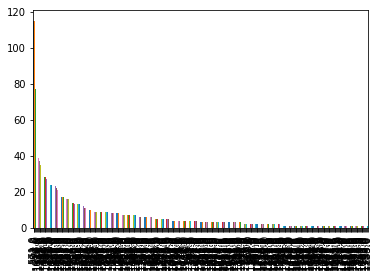

In [26]:
cancel.plot(kind='bar',rot=90)

### This shows a few areas which have abnormally large number of cancellations. These areas could be analysed closely for the reason.

In [27]:
point.online_booking.value_counts() #Counting onine booking values

0    21842
1    12450
Name: online_booking, dtype: int64

In [28]:
point.from_area_id[point.online_booking==1].value_counts().head() #Finding relation between online booking and area_id

393.0     1588
571.0      472
585.0      331
142.0      266
1384.0     250
Name: from_area_id, dtype: int64

### Area 393.0 and 571.0 have most online bookings

In [29]:
point.from_area_id[point.mobile_site_booking==1].value_counts().head() #Finding relation between mobile booking and area_id

393.0     260
585.0      43
1010.0     41
571.0      37
293.0      26
Name: from_area_id, dtype: int64

#### So 393.0 also has highest mobile site booking.

In [30]:
user=point.user_id
n=user.size
j=user.index

In [31]:
for i in range(0,10): #Loop over the total user count to find user personalied feed but for visibility do for 10 only here
    k=point.to_area_id[point.user_id==user[j[i]]].value_counts().nlargest(1) #Gives top value for place he likes
    print(i,"-->",k)

0 --> 448.0    1
Name: to_area_id, dtype: int64
1 --> 540.0    1
Name: to_area_id, dtype: int64
2 --> 1034.0    1
Name: to_area_id, dtype: int64
3 --> 398.0    1
Name: to_area_id, dtype: int64
4 --> 849.0    1
Name: to_area_id, dtype: int64
5 --> 393.0    1
Name: to_area_id, dtype: int64
6 --> 832.0    1
Name: to_area_id, dtype: int64
7 --> 376.0    1
Name: to_area_id, dtype: int64
8 --> 776.0    1
Name: to_area_id, dtype: int64
9 --> 1371.0    1
Name: to_area_id, dtype: int64


### The above can be used as a basic recommendation for a user based on his most frequent place he chooses as 'Destination' while booking

In [32]:
for i in range(0,10): #Loop over n-1 but for visibility do for 10 only here
    k=point.vehicle_model_id[point.user_id==user[j[i]]].value_counts().nlargest(1) #Gives top value for vehicle he books
    print(i,"-->",k)

0 --> 28    1
Name: vehicle_model_id, dtype: int64
1 --> 12    1
Name: vehicle_model_id, dtype: int64
2 --> 12    1
Name: vehicle_model_id, dtype: int64
3 --> 12    1
Name: vehicle_model_id, dtype: int64
4 --> 12    1
Name: vehicle_model_id, dtype: int64
5 --> 12    2
Name: vehicle_model_id, dtype: int64
6 --> 12    1
Name: vehicle_model_id, dtype: int64
7 --> 12    1
Name: vehicle_model_id, dtype: int64
8 --> 12    1
Name: vehicle_model_id, dtype: int64
9 --> 86    1
Name: vehicle_model_id, dtype: int64


### Similar to the previous one, we get a preference of the model_id of the car he likes to choose the most

In [36]:
# Find which vehicle used more frequently in an area


In [34]:
for i in range(0,10): #Loop over 586 but for visibility do for 10 only here 
    a=point.vehicle_model_id[point.from_area_id==p[i]].value_counts() #Looking into relation between area_id and vehicle most frequently used for that area
    print(p[i],"-->",a.head())

393.0 --> 12    2140
85     297
89     274
24     208
28     164
Name: vehicle_model_id, dtype: int64
571.0 --> 12    906
85     62
89     58
28     53
65     38
Name: vehicle_model_id, dtype: int64
585.0 --> 12    576
85     48
28     47
89     41
65     31
Name: vehicle_model_id, dtype: int64
293.0 --> 12    640
89     32
85     24
24     19
28     14
Name: vehicle_model_id, dtype: int64
1384.0 --> 12    412
89     41
65     36
28     34
85     30
Name: vehicle_model_id, dtype: int64
142.0 --> 12    419
85     40
89     38
24     25
28     19
Name: vehicle_model_id, dtype: int64
1010.0 --> 12    430
85     34
28     26
24     24
89     21
Name: vehicle_model_id, dtype: int64
83.0 --> 12    401
89     49
85     27
28     19
65     16
Name: vehicle_model_id, dtype: int64
1096.0 --> 12    312
89     23
28     18
85     16
24     16
Name: vehicle_model_id, dtype: int64
1026.0 --> 12    292
89     17
24     13
28      9
85      7
Name: vehicle_model_id, dtype: int64


### We see that most areas require model id 12 vehicles more. All other model ids  and their counts are mentioned. Hence this suggests that these areas should have vehicles of these mode_ids more

# --------------------

# POINT-To-POINT recaps:

##### >> Company can make use the finding of peak hours and batch of timings. The prices can be made high in peak hours and lower in others.
##### >> Company can also look up to the table which shows which area has most bookings and the timings of each area when most rush is there. So company can increase price in this area at this particular time.
##### >> Also, we have a table which shows in general at what time how much bookings are made. Time at which more bookings are made, company can have more vehicles in use and price more due to more demands
##### >> We have also  identified areas with most online and website bookings
##### >> Now, the app can provide each user with suggestions for the places he generally uses as destinationand also for the type of vehicle he uses. This shall facilitate the user and improve the performance for the app
##### >> The company can see what model of vehicle is more needed in an area and in general as well. 

### These points can drastically help the company gain and build customers and optimize its working. 

# -------------------------------------------------------------------------------------------------------------

# Long-Distance Package Analysis

In [35]:
long.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,1/1/2013 9:45,1/1/2013 9:45,0,0,1/1/2013 9:21,12.951850,77.696420,NaN,NaN,0
17,132531,22189,24,NaN,1,1383.0,NaN,NaN,32.0,1/12/2013 8:00,1/14/2013 0:00,1,0,1/1/2013 12:17,12.930451,77.685822,NaN,NaN,0
24,132539,22192,54,NaN,1,515.0,NaN,15.0,32.0,1/5/2013 8:30,1/5/2013 0:00,0,0,1/1/2013 14:40,12.978960,77.673450,NaN,NaN,0
158,132697,22275,28,NaN,1,136.0,NaN,1.0,152.0,1/4/2013 9:30,1/4/2013 9:30,1,0,1/3/2013 12:19,12.907960,77.624180,NaN,NaN,0
216,132760,22310,87,NaN,1,1118.0,NaN,NaN,32.0,1/6/2013 7:30,1/6/2013 0:00,1,0,1/4/2013 9:32,12.930220,77.560390,NaN,NaN,0


In [36]:
long.shape

(1589, 19)

In [37]:
long.isnull().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id             1589
travel_type_id            0
from_area_id             88
to_area_id             1588
from_city_id            196
to_city_id                1
from_date                 0
to_date                  85
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 1588
to_long                1588
Car_Cancellation          0
dtype: int64

#### Package id, to_area_id, to_lat, to_long are all empty so can't use these

In [38]:
long=long.drop(['package_id','to_area_id','to_lat','to_long'],axis=1)

In [39]:
# Since we have the from city id and area id and also latitude and longitude for the same but we don't have to_city or to_latitude and longitude id, so from_long and from_lat is of no use
long=long.drop(['from_lat','from_long'],axis=1)

In [40]:
#Taking only those rows with no nan values
long=long[long.from_city_id.notnull()]
long=long[long.from_area_id.notnull()]
long=long[long.to_date.notnull()]

In [41]:
long.isnull().sum()

id                     0
user_id                0
vehicle_model_id       0
travel_type_id         0
from_area_id           0
from_city_id           0
to_city_id             0
from_date              0
to_date                0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
dtype: int64

In [42]:
#Convert date and time to standard format
long.from_date = pd.to_datetime(long.from_date)
long.booking_created = pd.to_datetime(long.booking_created)
long.to_date = pd.to_datetime(long.to_date)

In [43]:
long['time_travel'] = long['to_date'] - long['from_date'] #Difference between booking time and the time when trip start
long['time_travel']=long['time_travel']/np.timedelta64(1,'m')
long.head()

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,time_travel
6,132519,22172,12,1,571.0,15.0,108.0,2013-01-01 09:45:00,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0.0
24,132539,22192,54,1,515.0,15.0,32.0,2013-01-05 08:30:00,2013-01-05 00:00:00,0,0,2013-01-01 14:40:00,0,-510.0
158,132697,22275,28,1,136.0,1.0,152.0,2013-01-04 09:30:00,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0.0
233,132780,22318,65,1,293.0,15.0,32.0,2013-01-05 08:00:00,2013-01-06 00:00:00,0,0,2013-01-04 12:43:00,0,960.0
234,132781,22319,87,1,912.0,1.0,32.0,2013-01-05 06:00:00,2013-01-05 06:00:00,1,0,2013-01-04 12:51:00,0,0.0


In [44]:
a=long.time_travel.value_counts()
a.head() #Time of travel in minutes and their counts

 0.0       158
 1440.0     73
 1079.0     73
-360.0      56
 2880.0     45
Name: time_travel, dtype: int64

In [45]:
long.drop(long[long['time_travel'] == 0.0].index, inplace = True) #Time of travel 0 minutes mean no sense

In [46]:
r=long.time_travel[long.time_travel<0]
r=r*(-1)
long.time_travel[long.time_travel<0]=r # #All negative values changed to positive because that may be an error

C:\Users\dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
long.drop(long[long['time_travel'] > 5000].index, inplace = True) # There are values of time of travel from 1970 to 2013. Obviously we don't want those

In [48]:
long.time_travel.mean() # Mean to travel time in minutes

1512.5173783515393

#### Mean travel time of each booking in this long package in minutes is 1500 mins. So all drivers should have an estimate of the fuel and resources for this much hours.

In [49]:
# To which city most bookings?
long.to_city_id.value_counts().head()

32.0     294
55.0     109
29.0      76
146.0     61
108.0     50
Name: to_city_id, dtype: int64

#### Most bookings are made to city 32.0 and 55.0

In [50]:
# Which vehicle model is used frequently for more travel
long.vehicle_model_id.value_counts().head()

12    459
65    246
87    113
89     66
85     36
Name: vehicle_model_id, dtype: int64

### For long distance, vehicles with id 12,65,87 are most popular

20    84
15    76
19    74
16    74
12    70
Name: booking_created, dtype: int64


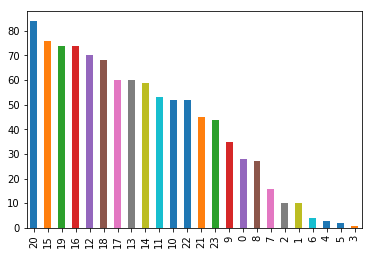

In [51]:
# For long journey, what batch timings most bookings made?
a=long.booking_created.dt.hour.value_counts() # Number of bookings made by time in hour
print(a.head())
a.plot(kind='bar')

### This shows the time for most bookings for Long distance journey. We see that most bookings are made in noon and evening period

In [52]:
long[(long.online_booking==1) | (long.mobile_site_booking==1)].count().head() #Finding total sum of online and mobile booking

id                  323
user_id             323
vehicle_model_id    323
travel_type_id      323
from_area_id        323
dtype: int64

In [53]:
long.shape

(1007, 14)

### This shows that 1004-323= 681 bookings are made via telephone

In [56]:
user=long.user_id
n=user.size
j=user.index

for i in range(0,10): #Loop over n-1 but for visibility do for 10 only here
    k=long.to_city_id[long.user_id==user[j[i]]].value_counts().nlargest(1) #Gives top value for place he likes
    print(i,"-->",k)

0 --> 32.0    1
Name: to_city_id, dtype: int64
1 --> 32.0    1
Name: to_city_id, dtype: int64
2 --> 29.0    1
Name: to_city_id, dtype: int64
3 --> 32.0    1
Name: to_city_id, dtype: int64
4 --> 32.0    1
Name: to_city_id, dtype: int64
5 --> 29.0    1
Name: to_city_id, dtype: int64
6 --> 64.0    1
Name: to_city_id, dtype: int64
7 --> 146.0    1
Name: to_city_id, dtype: int64
8 --> 179.0    1
Name: to_city_id, dtype: int64
9 --> 131.0    1
Name: to_city_id, dtype: int64


### This can act as a recommendation system for the company where they can suggest in their app of the destination city based on his frequency and past searches

## ---------------

## LONG Distance Package Recap:

##### >> We found the average travel time of each trip so the company can allocate resources  accordingly.
##### >> Company can find the place (city) to which most bookings are made.
##### >> Also, we can find the vehicles which people use most for the long distance package so more vehicles of these ids can be allotted to this package.
##### >> Company can identify from the bar graph at what time most bookings of long distance are made and accordingly recources could be made readay for maximum benefit.
##### >> We have also found an interesting fact that most bookings of long distance package are made via telephone.

### These points can drastically help the company gain and build customers and optimize its working. 

# ----------------------------------------------------------------------------------------------

# HOURLY package Analysis

In [57]:
hour.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,1/1/2013 16:00,NaN,0,0,1/1/2013 9:44,12.927320,77.635750,NaN,NaN,0
20,132535,22190,87,2.0,3,471.0,NaN,NaN,NaN,1/1/2013 14:30,NaN,0,0,1/1/2013 12:52,13.018540,77.635240,NaN,NaN,0
23,132538,21995,12,1.0,3,1286.0,NaN,NaN,NaN,1/1/2013 16:30,NaN,0,0,1/1/2013 14:39,12.973448,77.620320,NaN,NaN,0
34,132552,22201,12,1.0,3,1323.0,NaN,NaN,NaN,1/1/2013 20:00,1/1/2013 0:00,1,0,1/1/2013 17:25,12.869805,77.653211,NaN,NaN,0
47,132569,15846,12,2.0,3,142.0,NaN,NaN,NaN,1/2/2013 3:00,NaN,0,0,1/1/2013 19:37,12.912810,77.609230,NaN,NaN,0


In [58]:
hour.shape

(7550, 19)

In [59]:
hour.isnull().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id                0
travel_type_id            0
from_area_id              0
to_area_id             7550
from_city_id           7102
to_city_id             7550
from_date                 0
to_date                2620
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                 7550
to_long                7550
Car_Cancellation          0
dtype: int64

In [60]:
# We see that there are some columns which most of the data missing: to_area_id, from_city_id, to_city_id, to_lat, to_long so we have no option than to drop these.
hour=hour.drop(['to_area_id', 'from_city_id', 'to_city_id', 'to_lat', 'to_long'],axis=1)

In [61]:
# We can not fill the nan values in to_date for the 2000 columns, so we drop these rows with nan value
hour=hour[hour.to_date.notnull()]

In [62]:
hour.isnull().sum()

id                     0
user_id                0
vehicle_model_id       0
package_id             0
travel_type_id         0
from_area_id           0
from_date              0
to_date                0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
Car_Cancellation       0
dtype: int64

In [63]:
#Convert date and time to standard format
hour.from_date = pd.to_datetime(hour.from_date)
hour.booking_created = pd.to_datetime(hour.booking_created)
hour.to_date = pd.to_datetime(hour.to_date)

In [64]:
hour.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
34,132552,22201,12,1.0,3,1323.0,2013-01-01 20:00:00,2013-01-01,1,0,2013-01-01 17:25:00,12.869805,77.653211,0
80,132609,2005,24,1.0,3,1086.0,2013-01-02 12:15:00,2013-01-02,1,0,2013-01-02 10:14:00,12.907487,77.647290,0
90,132620,22236,85,2.0,3,393.0,2013-01-02 16:00:00,2013-01-02,1,0,2013-01-02 11:59:00,13.199560,77.706880,0
91,132621,18777,12,1.0,3,293.0,2013-01-02 17:00:00,2013-01-02,1,0,2013-01-02 12:15:00,12.849482,77.663187,0
101,132632,694,28,2.0,3,6.0,2013-01-02 16:00:00,2013-01-02,1,0,2013-01-02 14:34:00,12.977390,77.617620,0


## NOTE: Here many things like in last two cases can be found. I AM LEAVING THOSE THINGS BECAUSE THESE SUGGESTIONS ARE BECOMING REDUNDANT. Here let us try to find some more different observations 

In [65]:
# Here we have package_id: package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)
a=hour.package_id.value_counts()
a.head()

1.0    2104
2.0    1430
6.0     502
4.0     412
3.0     375
Name: package_id, dtype: int64

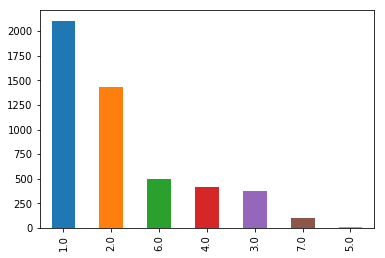

In [66]:
a.plot(kind='bar')

### We see that people mostly prefer 4hrs and 40km hour package the most followed by 8 hrs & 80 kms

11    176
12    176
10    167
9     158
13    142
Name: booking_created, dtype: int64


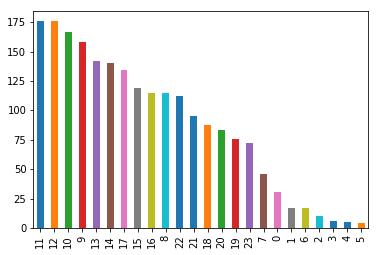

In [67]:
# For hourly with package_id=1, what batch timings most bookings made?
d=hour.booking_created[hour.package_id==1.0].dt.hour.value_counts() # Number of bookings made by time in hour
print(d.head())
d.plot(kind='bar')

In [68]:
hour.vehicle_model_id[hour.package_id==1.0].value_counts().head()

12    1803
89     129
85      55
28      55
24      25
Name: vehicle_model_id, dtype: int64

### For package_id=1 (4 hours and 40kms), people prefer, morning and afternoon timing batch with vehicle id 12, 89 mostly demanded

10    123
9     106
11    105
22     95
12     85
Name: booking_created, dtype: int64


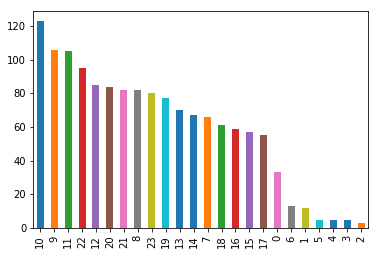

In [69]:
# For hourly with package_id=2, what batch timings most bookings made?
e=hour.booking_created[hour.package_id==2.0].dt.hour.value_counts() # Number of bookings made by time in hour
print(e.head())
e.plot(kind='bar')

In [70]:
hour.vehicle_model_id[hour.package_id==2.0].value_counts().head() #Count of vehicles preferred for papckage 2

12    882
65    211
89    105
87     80
85     54
Name: vehicle_model_id, dtype: int64

### For package_id=2 (8 hours and 80kms), people prefer, morning and afternoon timing batch with vehicle id 12, 65 mostly demanded

In [71]:
# Let us try to find in which package id do we have maximum cancellations
max=0
def count_cancel(i):
    max=0
    k=hour[hour.package_id==i]
    val=k.Car_Cancellation[k.Car_Cancellation==1].value_counts().max()
    if val > max:
        max=val
        id=k.Car_Cancellation[k.Car_Cancellation==1].value_counts().idxmax() 
        return(id)
    return (-1)

for i in range(1,8):
    out=count_cancel(i)
    if out==-1:
        idx=0
    else:
        idx=out
        
out

1

#### This shows that most cancellations occur in package_id=1

In [72]:
hour[(hour.online_booking==1) | (hour.mobile_site_booking==1)].count().head() #Sum of online and mobile site booking

id                  2307
user_id             2307
vehicle_model_id    2307
package_id          2307
travel_type_id      2307
dtype: int64

In [73]:
hour.shape

(4930, 14)

### This shows that out of 4930 bookings, most bookings are telephonic

## -----------

# HOURLY Package RECAP:
##### >> Here we did not find the earlier findings because of redundancy factor but they are easily computable by changing the codes for above ones.
##### >> Other interestings finds:
##### >> The company can find which package is used and liked more by people and we found that the package offering 4 hrs & 40km was the most booked one.
##### >> Company can benefit from the bar graph showing which timing is most preferred by people selecting different packages and accordingly in the peak times the company can hike the prices.
##### >> Also, for each kind of package what kind of vehicle is preferred can help the company place more vehicles of that type.
##### >> We also saw most cancellations occur in package 1 so the matter can be closely inspected by the company for efficient working.
##### >> It was also seen that most bookings of hourly distance package are made via telephone.

### These points can drastically help the company gain and build customers and optimize its working. 

# ------------------------------------------------------------------------------------------

### This was some basic insight from my side on the given dataset. I have tried to look at various aspects of how different data can help the company gain more insight thus leading to a better and more efficient working. 

#### I hope you loked my work and if used, I hope these insights actually do help XRides. Thanks :)

## Vipul Vaibhav
